It should be clear from my previous posts that I'm not a fan of hypothesis testing (which is sometimes called model comparison in the Machine Learning and Bayesian Statistics). Once we settled on the [detective approach](http://simkovic.github.io/2014/04/14/Statistics-as-Toolbox-and-Statistics-as-Detective-Work.html) to data analysis - and this is at least in principle not controversial - then the next fork where most researchers go astray is the choice between hypothesis testing (HT) and parameter estimation (PE). PE has been advocated by the new statistics movement and in principle should not be controversial either. Suprisingly, the recent advocates ([here](http://pss.sagepub.com/content/early/2014/03/06/0956797614525969.extract) and [here](https://webfiles.uci.edu/mdlee/Lee2014_NewStatistics.pdf)) come from the bayesian corner where PE has already been dominant. These advocates offer three arguments:

a) HT (in terms of falsifying existing theories) features prominently in Popper's philosophy of science. You don't want to stage an attack on Popper, do you?! Anyway, there doesn't seem to be any alternative to Popper at the moment so - for better or worse - we are stuck with HT. 

b) Their argument is actually for a mixture of HT and PE (all that matters is that it's bayesian). So their argument is that more is better. The radical position here is mine, because I'm claiming that HT should be abandoned.

c) The failure of HT so far is due to frequentist statistics. If we use bayesian model comparison instead, these problems go away.

The frequentist apologetes may add that HT fails because it is not applied adequately. In psychology

d) questionable research practices are prevalent
e) replication efforts are rare
f) null results are not reported/published

a) will require some more discussion and I'm already tackling it in the parallel series of posts.

b) can be handled quickly. Note that the transition between PE and HT is gradual.

> When the hypotheses become very numerous, a different approach [rather than hypothesis testing] seems called for. A set of discrete hypotheses can always be classified by assigning one or more numerical indices which identify them, as in $H_t, 1<t<n$ and if the hypotheses are very numerous one can hardly avoid doing this. Then deciding between the hypotheses $H_t$ and estimating the index $t$ are practically the same thing, and it is a small step to regard the index, rather than the hypotheses, as the quantity of interest; then we are doing parameter estimation. (Jaynes,p. 149)

As a direct consequence, PE and HT overlap in practice. If I know that 95% interval of the parameter estimate is [0.1,0.2] then I know that the estimate is significantly different from zero (at $\alpha = 0.05$, undirected test). Note however, that the overlap is only partial. I can't recover the effect magnitude and its percentile interval from a statement about it's significance. If HT is a reduced version of PE, then someone who advocates HT is asking us to constrain our inference rather than expand it.

c,d,e and f are irrelevant with respect to the failure of HT. This can be easily shown after some thought. I illustrate with an exercise in image processing.

In a distant universe the reality/truth looks like this:

Populating the interactive namespace from numpy and matplotlib


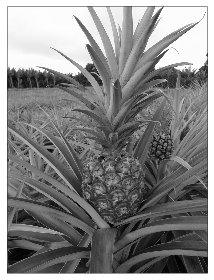

In [1]:
%pylab inline
from scipy.stats import scoreatpercentile as sap
import urllib2 as urllib			
from PIL import Image
from cStringIO import StringIO			
imgfile = urllib.urlopen('http://tiny.cc/0rmaox')
im = StringIO(imgfile.read())
I = Image.open(im)
I=np.asarray(I.convert('L'))
I=I/float(np.max(I))
def showImage(I):
    plt.imshow(I,cmap='gray');plt.grid();ax=plt.gca()
    ax.xaxis.set_visible(False);ax.yaxis.set_visible(False)
showImage(I)

Reality is an ananas and the beings in this reality wish to find out what reality looks like. They set up a research institute to find out. The research institute is subdivided into departments. Each department consists of specialized groups which consist of scientists. At the bottom of the hierarchy each scientist studies a single pixel. The pixel measurements are noisy. Each scientist gathers multiple measurements and tries to figure out what the picture looks like. We create the data.

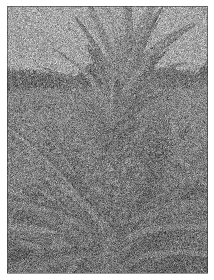

In [2]:
D=[]
N=30 # number of observations
np.random.seed(4)
for i in range(N):
    D.append(I+np.random.randn(I.shape[0],I.shape[1])*0.3)
D=np.array(D)
showImage(D[0,:,:])

PE works like breeze. We estimate the intensity at each pixel and along with the CI.

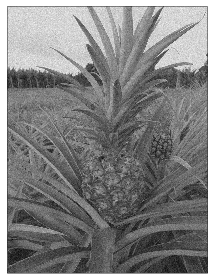

In [3]:
showImage(np.mean(D,axis=0))

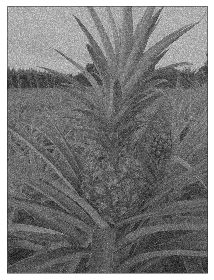

In [4]:
showImage(sap(D,97.5,axis=0))

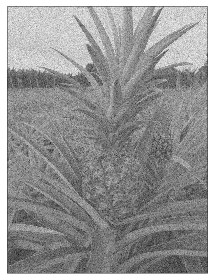

In [5]:
showImage(sap(D,2.5,axis=0))

Reality is ananas. 

Let's try HT. H0 says that all pixel values are equal. H1 says that they are different. For simplicity we use z-test. The result of HT looks like this.

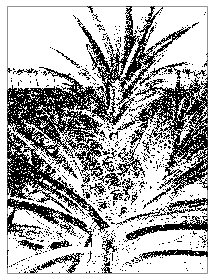

In [6]:
h0=np.mean(D)
d=D.mean(axis=0)-h0
se=D.std(axis=0)/N**0.5
black=np.int32(d<-2*se)
white=np.int32(d>2*se)
showImage(black+white)

The white pixels are significantly different different from the expected value of random proces (0.5). In the case of the black pixels the test was inconclusive. For the benefit of HT, let's say our test was bidirectional. Then our test shows the following picture.

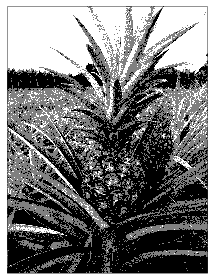

In [7]:
showImage(white+0.5*(1-black)*(1-white))

Not bad. Note however that the gray pixels are not gray but rather indicate a question mark. With enough data the gray pixels disappear and the result of HT looks like this.

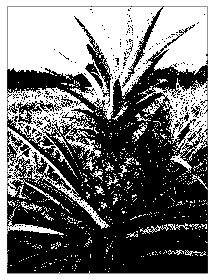

In [8]:
h0=np.mean(D)
d=D.mean(axis=0)-h0
showImage(d>0)

This is the black-and-white version of the PE estimate. It's difficult to recognize the ananas. 

The usual response would be to run subsequent hypothesis tests with more specific hypotheses that would tell us what kind of shade of gray the pixels are. It should be clear that such an effort is a waste of data. We already saw that we do have enough data to make a reasonable guess with PE.

Another option would be to test multiple hypotheses from the outset - say ten hypotheses with equally spaced range over the whole gray scale. In the limit this approach reduces to PE.   

Note that replication, bayes factors or power calculation do not help us a bit here. The problem is the binary filter. The reality is not black and white and HT and it's binary filter does not work.

Now here is the killer argument from the HT advocate. Researcher A in our ananas-reality comes up with the alternative hypothesis that the reality looks like is this:

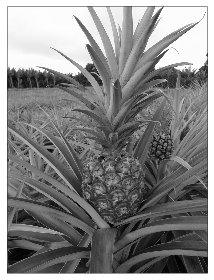

In [9]:
showImage(I)

Spot on, he gets every single pixel value right with a float-point precision!

He tests this hypothesis against the null that all pixels are equal. We use F-test.

In [10]:
from scipy import stats
K=I
F=N*K.var()/np.square(D-np.atleast_3d(K.T).T).sum()*(D.size-K.size)
print 'F = %.3f, p = %.4f'%(F,1-stats.f.cdf(F,1,N-1))

F = 22.426, p = 0.0001


Super-significant. Great.

However what happens if another researcher B comes up with another theory-of-everything which happens to be random noise. He tests against the same $H_0$

F = 9.908, p = 0.0038


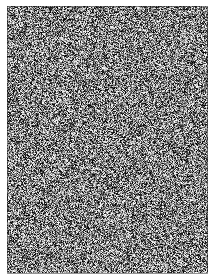

In [11]:
K=np.random.rand(I.shape[0],I.shape[1])
F=N*K.var()/np.square(D-np.atleast_3d(K.T).T).sum()*(D.size-K.size)
print 'F = %.3f, p = %.4f'%(F,1-stats.f.cdf(F,1,N-1))
showImage(K)

Also significant. Duh.

Note that this does not concern this particular pattern of noise but any pattern of black-and-white noise.

In [12]:
for i in range(20):
    K=np.random.rand(I.shape[0],I.shape[1])
    F=N*K.var()/np.square(D-np.atleast_3d(K.T).T).sum()*(D.size-K.size)
    print 'F = %.3f, p = %.4f'%(F,1-stats.f.cdf(F,1,N-1))

F = 9.916, p = 0.0038
F = 9.930, p = 0.0038
F = 9.913, p = 0.0038
F = 9.933, p = 0.0038
F = 9.916, p = 0.0038
F = 9.919, p = 0.0038
F = 9.935, p = 0.0038
F = 9.948, p = 0.0037
F = 9.927, p = 0.0038
F = 9.919, p = 0.0038
F = 9.932, p = 0.0038
F = 9.933, p = 0.0038
F = 9.922, p = 0.0038
F = 9.933, p = 0.0038
F = 9.934, p = 0.0038
F = 9.927, p = 0.0038
F = 9.913, p = 0.0038
F = 9.930, p = 0.0038
F = 9.926, p = 0.0038
F = 9.929, p = 0.0038


The multitude of significant hypotheses could be resolved with (properly powered) direct test, that sets researcher's A hypothesis against the hypothesis of researcher B. Note that this solution is not perfect because there are hypotheses that are better supported by the data than the ground truth. For instance if our hypothesis happens to be more similar to the sample mean than to the ground truth.

F = 24.205, p = 0.0000


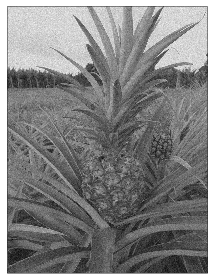

In [13]:
K=D.mean(axis=0)
F=N*K.var()/np.square(D-np.atleast_3d(K.T).T).sum()*(D.size-K.size)
print 'F = %.3f, p = %.4f'%(F,1-stats.f.cdf(F,1,N-1))
showImage(K)

The killer argument thus fails to convince. First, the HT advocates owe us a description how to derive a hypothesis that would lead us to the right answer faster than PE. In our example it is highly non-trivial to get all the pixel values right (before we see any data). Second, it is difficult to see (based on a single test) whether our hypothesis is the true theory of everything or just black-and-white noise. The true hypothesis usually explains more variance and we can use the effect size as an index that helps us to distinguish these cases. But we also saw that this method is not perfect, since the sample mean provides a better fit than the ground truth. Third, if the process for coming up with hypotheses is not made explicit, it is not accountable and this stage of data analysis can be exploited by strategies such as HARK-ing and p-hacking.

But our reality is not a picture and our noise is not independent random pixel noise, right?! How are the lessons from the Ananas universe relevant to our science? Let's add some complexity. Let's consider correlated noise - this is in fact what we find in typical sets of images such as images of faces. If an image of face has a white pixel then probably the face color is pale white and there will be other white pixels in the image. A common way to analyse such image set is to decompose it into a linear sum of component images $I_n=m_{n,1} H_1 + m_{n,2} H_2 + m_{n,3} H_3 + \dots$, where $I_n$ is the n-th image in the sample, $H_i$ is the i-th component image and $m_{n,i}$ is the weight given to $H_i$ in the composition of image $I_n$. Now a set of $N$ images can be described by any (orthogonal) set of $\geq N$ components - we can always find some values $m_{n,i}$ for a any given (orthogonal) set of $H_i$ such that we obtain the image $I_n$. Usually we wish to obtain compressed representation that describes data well. That is we wish to use few components. By eigenvalue decomposition we obtain $m_{n,i}$ and $H_i$ (eigenvectors/eigenimages) where the first $k$ components explain the most variance. The proportion of explained variance can be computed from the eigenvalues, that are also obtained as a part of the eigenvalue decomposition. As another consequence the components $H_i$ are orthogonal. This decomposition is used in Principal Component Analysis. Other useful decompositions are provided by Independent Component Analysis and Fourier Analysis. These decompositions have in common that they maximize some criterion (e.g. variance explained) and that the components are orthogonal/independent.

Intuitively, HT-driven science performs such decomposition, where $H_i$ correspond to hypotheses and the proportion of explained variance corresponds to the effect size. Intuitively, we should target independent $H_i$. If researcher A tests a $H_a$ about memory and researcher B tests $H_b$ about decision making then we hope that the hypotheses describe independent mechanisms such that someday we can put the theoretical results of researcher A and B together and obtain a valid model of people's decision making in memory tasks. Furthermore, we target $H_i$ that explain lot of variance. The magnitude of effect size is used to judge the importance of the $H_i$. Again the problem with this approach is that we don't know how to derive $H_i$. The effect size is only a poor proxy because the sample does not represent the people's natural behavior but rather the behavior in the experiment which can be and usually is artificial. The effect size thus can't be compared across experiments and across $H_i$ in our component set. 

Our alternative approach is to do sort of PCA/ICA. We estimate the $H_i$ along with the uncertainty. We are not interested in the proportion of variance explained. The merit of $H_i$ is considered with posterior predictive checking. In this approach it is not necessary to formulate $H_i$ apriori. Rather we derive it from the data. In this respect it is more intuitive to speak of model $M_i$ rather than hypothesis.

I don't want to dwell here much on my alternative to HT. For the present purpose I just conclude that PE is always preferable to HT. I illustrated this for several cases with (relatively) simple noise structure. In science our theories consist of a set of causal claims, not a set of linear component images. The insights that we obtained with images extend to causal claims. In particular, the causal claims, just like component images, are modular and independent. Furthermore, we strive to discover causal claims that have strong predictive power - i.e. we wish to discover causes that explain high proportion of effect's variance.